#AULA 1

#Introdução
Nesse trecho vamos só mostra que o google.colab (%notebook) interpreta/roda código de python.


In [1]:
print ("Gilberto Raitz")
print ("aula de data science alura - QUARENTENADOS")

Gilberto Raitz
aula de data science alura - QUARENTENADOS


importação de bibliotecas a serem usadas no notebook.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregando os Arquivos

Foi carregado dados referente a avaliações de filmes do site https://grouplens.org/datasets/movielens/

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#para carregar direto do repositorio o mesmo tem que estar em dominio publico.
filmes.columns = ["filmeid", "titulo", "genero"]
filmes.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
avaliacoes.shape

(100836, 4)

Renomenando as colunas do dado.

In [7]:
avaliacoes.columns = ["userarioid", "filmeid", "nota", "momento"]
avaliacoes.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Avalições estatísticas dos dados.


In [8]:
avaliacoes.describe()

,userarioid,filmeid,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
avaliacoes.query("filmeid==1").describe()

,userarioid,filmeid,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [11]:
avaliacoes.query("filmeid==1")["nota"].mean()

3.9209302325581397

In [12]:
avaliacoes.query("filmeid==1").mean()

userarioid    3.065302e+02
filmeid       1.000000e+00
nota          3.920930e+00
momento       1.129835e+09
dtype: float64

Extraindo variavel de um unico filme para poder avaliar separadamente

In [0]:
#o code não esta organizado, de uma forma mais correta seria extrair a variavel filme um e fazer todas as avalizaçoes deste filme separadamente 

In [14]:
avaliacoes_filme_1 = avaliacoes.query("filmeid==1")
avaliacoes_filme_1.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [15]:
notas_medias_por_filme = avaliacoes.groupby("filmeid")["nota"].mean()
#notas_medias_por_filme.head()
notas_medias_por_filme

filmeid
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [16]:
filmes

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
#para unir a tabela (nome do filme) com a média se faz a pergunta, será que todos os filmes obtiveram votação?

In [0]:
#filmes["nota_media"] = notas_medias_por_filme
#filmes.head()
#assumindo que os numeros de linhas batem entre os title e nota_media e a ordem é a mesma.
#não quero correr o risco de amanha os fimes não estarem em quantidade exata e ter que alterar o dataset

#DESAFIO 1
Encontre quais filmes não possuem notas

In [19]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeid")
filmes_com_media.head()

,filmeid,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [20]:
filmes_com_media.sort_values("nota")

,filmeid,titulo,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 02
Mudar o nome da coluna para média apos o join.


In [21]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeid,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 03
Colocar quantos avaliaçoes tiveram cada filme


In [22]:
avaliacoes.query("filmeid in [1,2,102084]")

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


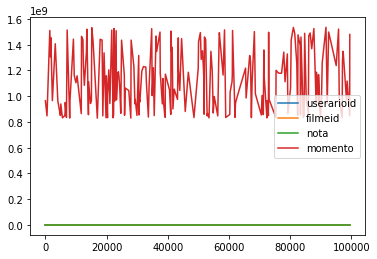

In [23]:
avaliacoes.query("filmeid == 1").plot()

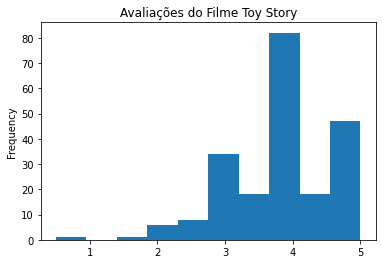

In [24]:
avaliacoes.query("filmeid == 1")['nota'].plot(kind='hist', title='Avaliações do Filme Toy Story')
#plt.title("Avaliação do Filme Toy Story")
#plt.show()

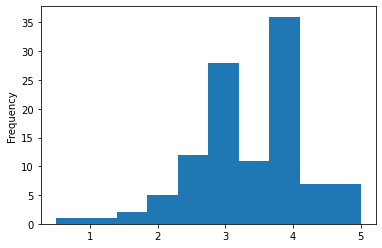

In [25]:
avaliacoes.query("filmeid == 2")['nota'].plot(kind='hist')

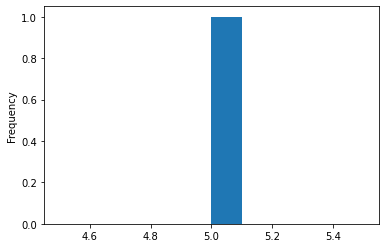

In [26]:
avaliacoes.query("filmeid == 102084")['nota'].plot(kind='hist')

#DESAFIOS 4 - 7

04 - Arredondar as medias (coluna de nota média) para duas casas decimais
05 - Descobrir os generos dos filmes (quais são eles, unicos) (esse aqui o bicho pega)
06 - Contar o numero de aparições de cada genero
07 - Plotar o grafico de aparições de cada genero. Pode ser um grafico de tipo igua a barra.

#AULA 2 

Inicio da aula quarentenaDados.


In [27]:
filmes["genero"].str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
filmes["genero"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [29]:
filmes["genero"].str.get_dummies("|").sum(axis=1)

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [30]:
filmes["genero"].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [31]:
filmes["genero"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [32]:
filmes["genero"].str.get_dummies("|").sum().sort_values()

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

In [33]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
#este dado é uma serie porque tem apenas uma coluna, pois a chamada drama, comedy e etc é o index da tambela

In [35]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [36]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [37]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [38]:
filmes["genero"].str.get_dummies("|").sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

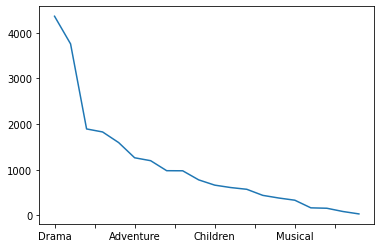

In [39]:
#não faz sentido nenhum para demostrar os dados
 filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot()

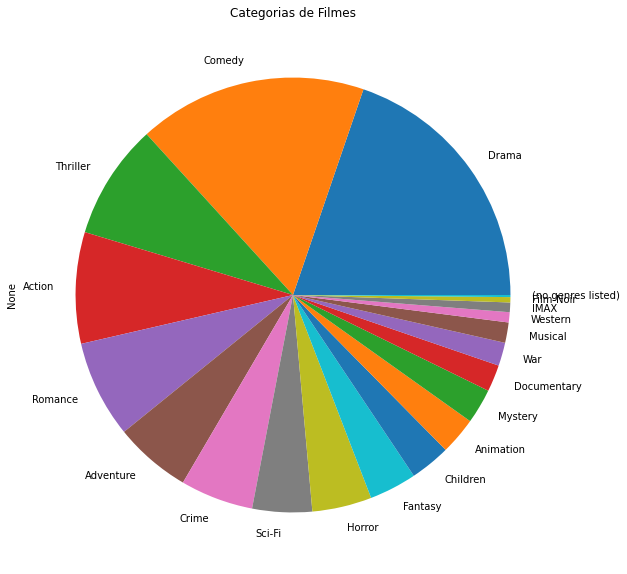

In [40]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de Filmes',
    figsize=(10,10))

In [0]:
#nunca me entregue um dado de pizza, o cerebro não e feito para entregar um dado de area, comparando a area de comedia com drama

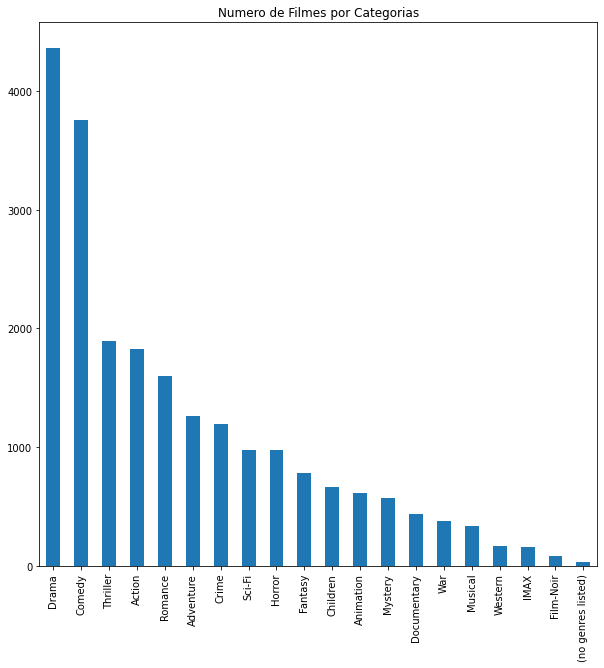

In [42]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Numero de Filmes por Categorias',
    figsize=(10,10),)
plt.show()

In [43]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<function matplotlib.pyplot.show>

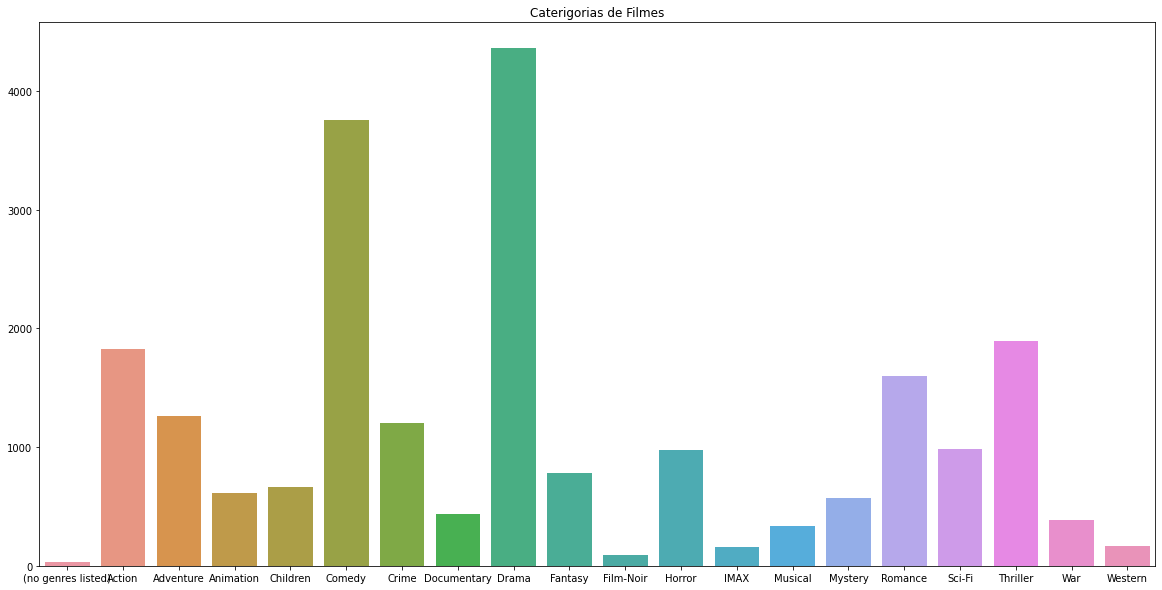

In [44]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_index()
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

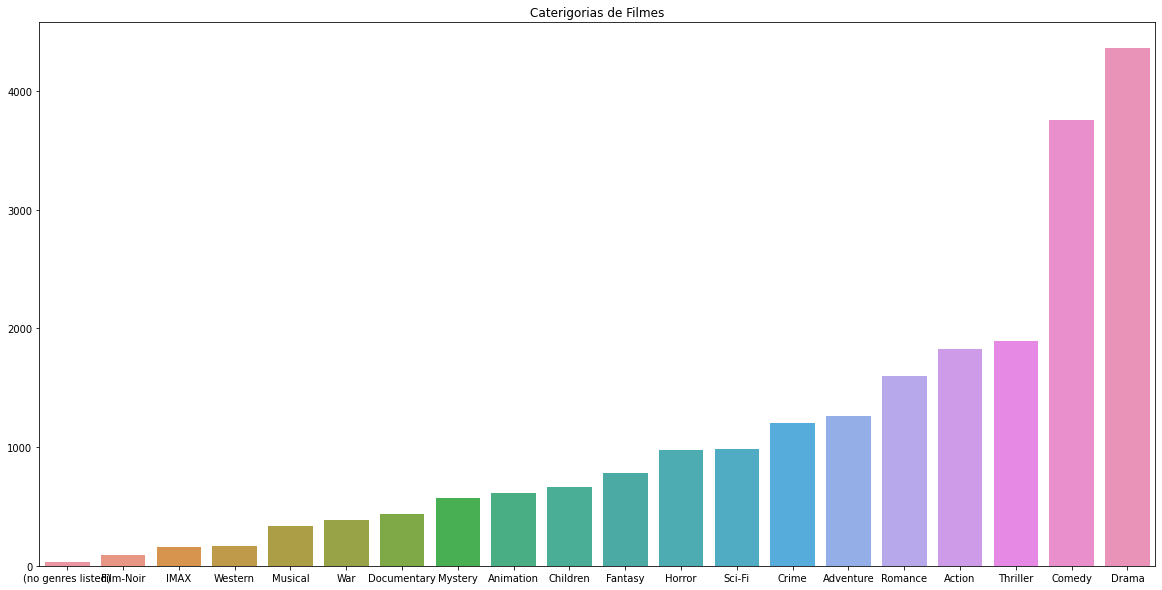

In [45]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values()
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

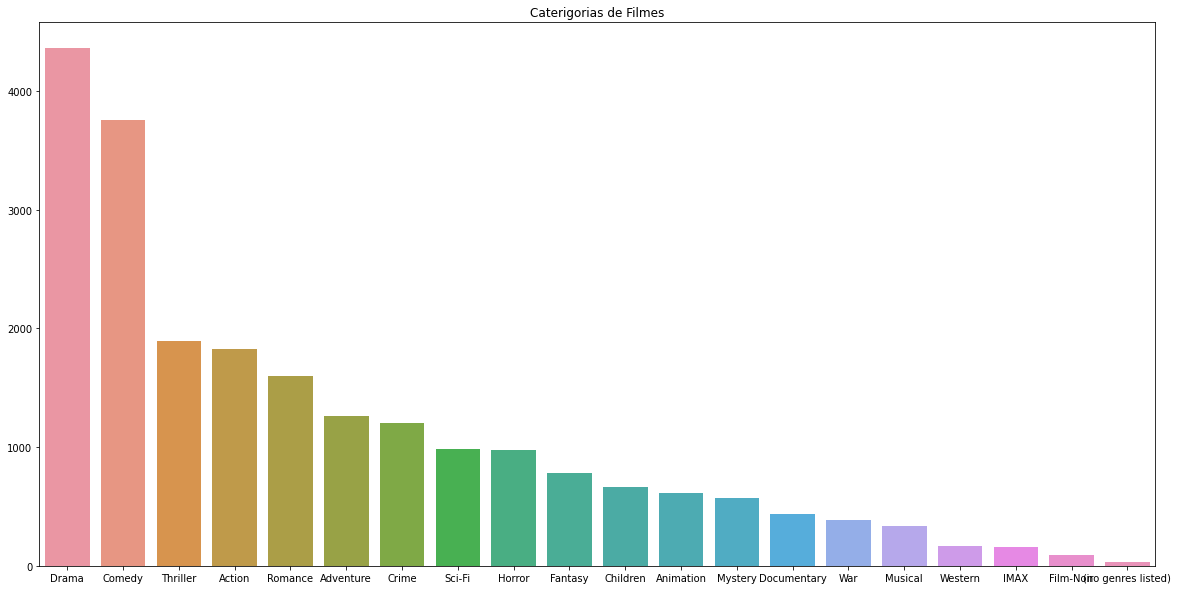

In [46]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

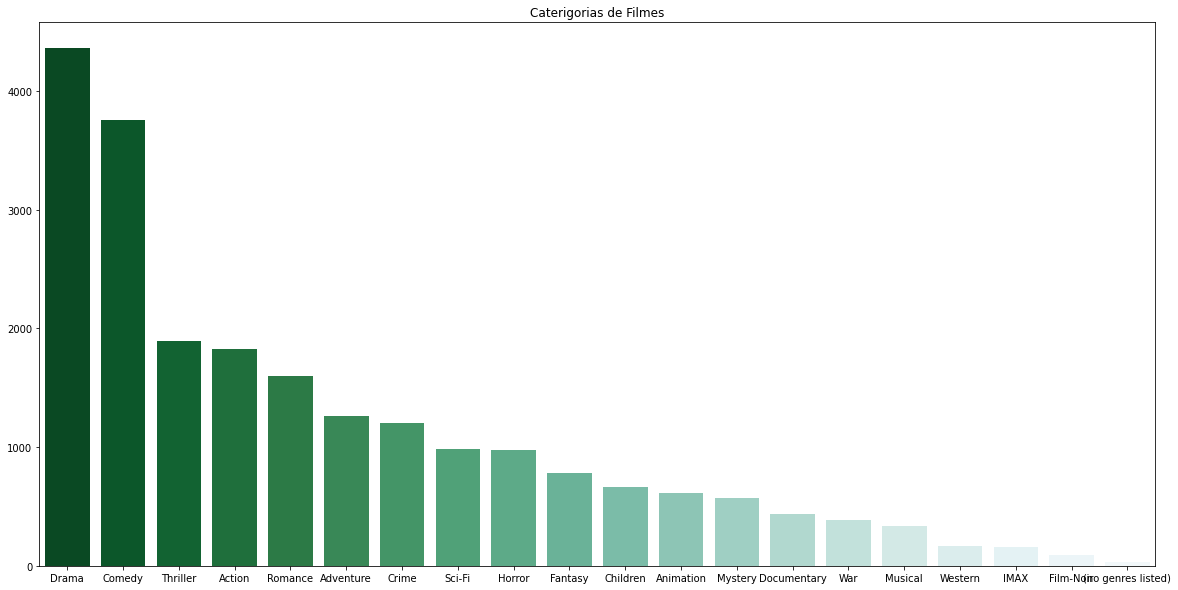

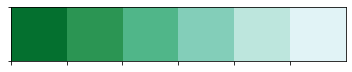

In [47]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

<function matplotlib.pyplot.show>

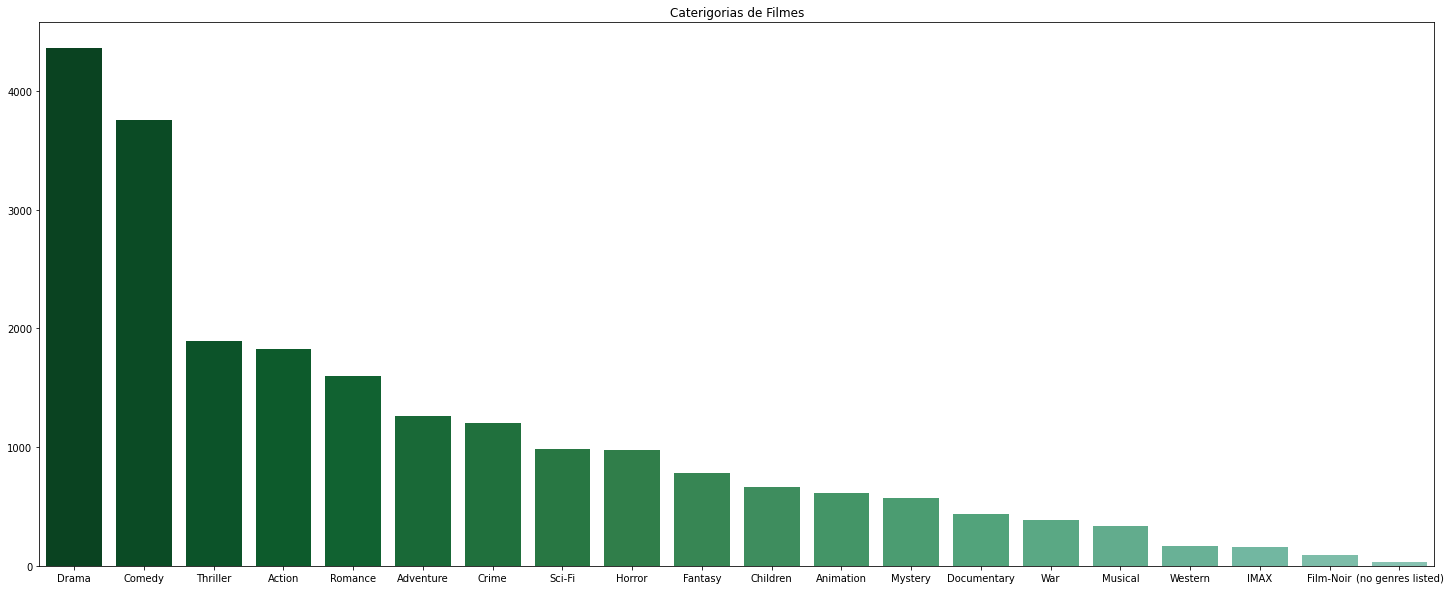

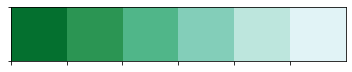

In [48]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(25,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+15))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

<function matplotlib.pyplot.show>

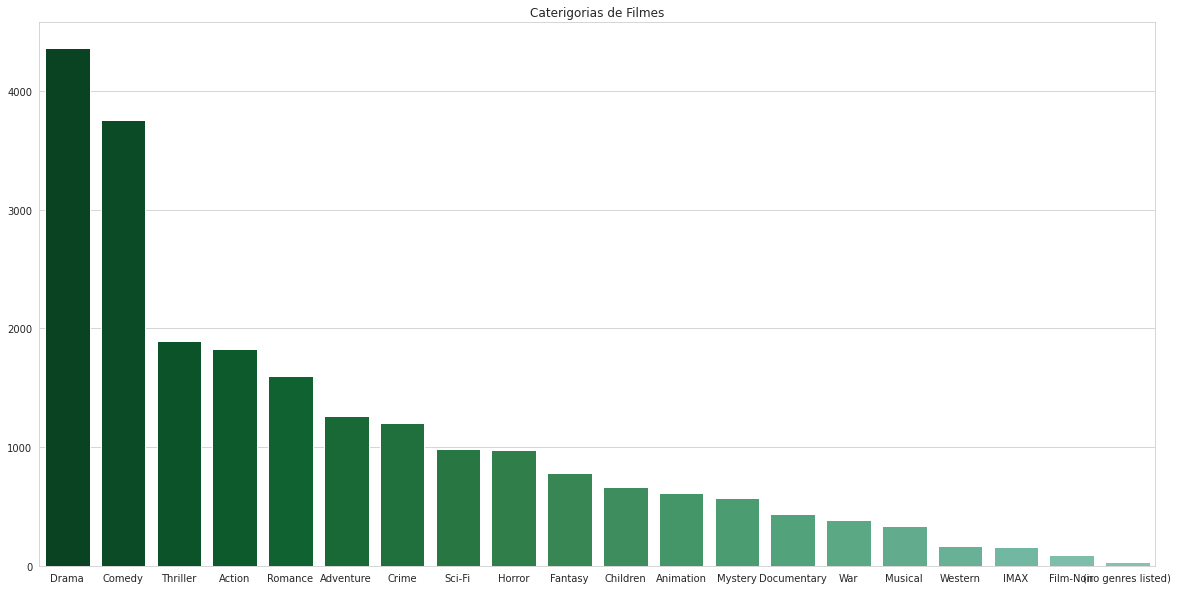

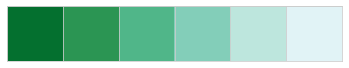

In [49]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+15))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

#DESAFIO 1

Rotacionar os thincks (os noems dos generos) 

3.9209302325581397


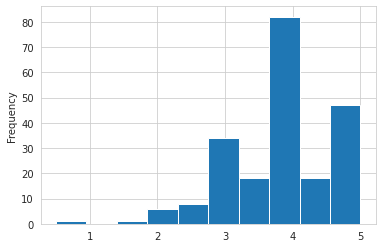

In [50]:
avaliacoes_filme_1 = avaliacoes.query("filmeid==1")["nota"]
print(avaliacoes_filme_1.mean())
avaliacoes_filme_1.plot(kind="hist")
plt.show()

3.4318181818181817


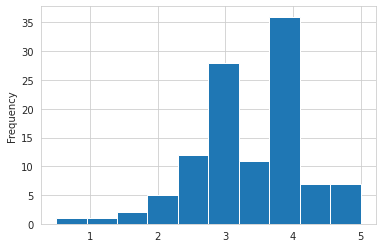

In [51]:
avaliacoes_filme_2 = avaliacoes.query("filmeid==2")["nota"]
print(avaliacoes_filme_2.mean())
avaliacoes_filme_2.plot(kind="hist")
plt.show()

In [52]:
avaliacoes_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [53]:
avaliacoes_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [56]:
filmes_com_media.sort_values("nota", ascending=False)[2000:2500]

,filmeid,titulo,genero,nota
6139,43914,Winter Passing (2005),Drama,4.000000
1386,1900,"Children of Heaven, The (Bacheha-Ye Aseman) (1...",Comedy|Drama,4.000000
1387,1902,Dream for an Insomniac (1996),Drama|Romance,4.000000
5889,33237,San Francisco (1936),Drama|Musical|Romance,4.000000
5827,32234,Julia (1977),Drama,4.000000
...,...,...,...,...
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,3.883117
1230,1635,"Ice Storm, The (1997)",Drama,3.882353
225,261,Little Women (1994),Drama,3.880952
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.880435


In [0]:
def plot_filme(n):
    avaliacoes_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
    avaliacoes_filme.plot(kind="hist")
    return avaliacoes_filme.describe()

count    11.000000
mean      3.454545
std       0.722999
min       2.000000
25%       3.000000
50%       3.500000
75%       3.750000
max       4.500000
Name: nota, dtype: float64

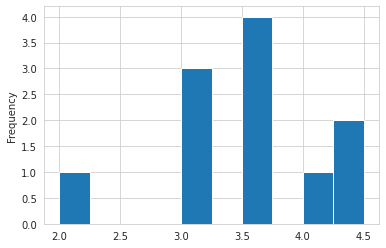

In [72]:
plot_filme(6242)

#DESAFIO 2

Comparar filmes com notas parecidas com destribuiçoes diferentes

In [0]:
def plot_filme(n):
    avaliacoes_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
    avaliacoes_filme.plot(kind="hist")
    plt.show()
    avaliacoes_filme.plot.box()
    plt.show()
    return avaliacoes_filme.describe()

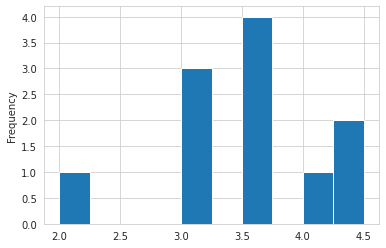

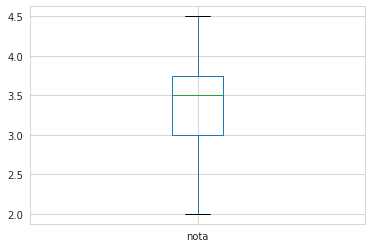

count    11.000000
mean      3.454545
std       0.722999
min       2.000000
25%       3.000000
50%       3.500000
75%       3.750000
max       4.500000
Name: nota, dtype: float64

In [85]:
plot_filme(6242)

In [0]:
#traço superior max value
#traço inferior min value
#reta no dentro do retangulo mediana
#retangulo superior 75%
#retangulo inferior 25%
#biblioteca panda e max e min

#desafio 3

Pegar os 10 filmes com mais votos e fazer a os boxplots

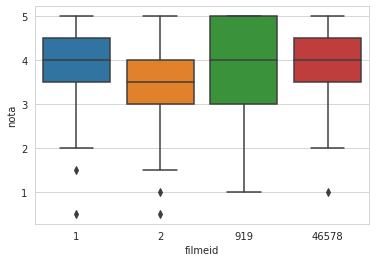

In [86]:
sns.boxplot(data = avaliacoes.query("filmeid in [1,2,919,46578]"), x="filmeid", y="nota")

#DESAFIO 4

O boxplot estar em um tamanho adequado e com os nomes dos filmes dos thicks

#DESAFIO 5 

Calcular moda, media e mediana dos filmes. Explore filmes com notas mais proximas de 0,5, 1, 3 e 5.

#DESAFIO 6

Plotar o bloxplot e o histograma um lado do outro (na mesma figura ou em figuras distintas)

#DESAFIO 7 

Grafico de notas médias por ano
dica: possui series que não possuem ano

